# MTData: Profile Example

Now that we've created an `MTCollection` object we can use it to do the more interesting things, like analyze strike, plot phase tensors, create inputs for modeling programs.

## 1. Open Collection

In the previous notebook we created an `MTCollection` object called `test_mt_collection.h5`.  Lets open it and get the profile.

In [1]:
from pathlib import Path

from mtpy import MTCollection

In [2]:
mtc = MTCollection()
mtc.open_collection(Path().cwd().joinpath("test_mt_collection.h5"))

In [3]:
mtc.working_dataframe = mtc.master_dataframe.loc[
    mtc.master_dataframe.survey == "profile"
].query('station.str.startswith("15")')

In [4]:
mtc.working_dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
59,15125A,profile,-22.370806,149.188639,200.0,15125A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
60,15126A,profile,-22.370639,149.193500,200.0,15126A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
61,15127A,profile,-22.371028,149.198417,201.0,15127A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
62,15128A,profile,-22.370861,149.203306,200.0,15128A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
63,15129A,profile,-22.371083,149.208083,202.0,15129A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>
64,15130A,profile,-22.371222,149.212972,201.0,15130A,none,True,True,False,0.000096,2.857143,<HDF5 object reference>,<HDF5 object reference>


## 2. Convert to MTData

Now that we have the profile let's convert it to an `MTData` object.

In [5]:
mtd = mtc.to_mt_data()

### 2a. Close MTCollection

You can now close the MTCollection to make sure if something crashes the file won't get corrupt for unknown reasons.

In [6]:
mtc.close_collection()

23:10:19T17:34:53 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy-v2\docs\source\notebooks\test_mt_collection.h5


### 2b. Station Locations

A convenient attribute of `MTData` is the `station_locations` object.  This is a `mtpy.core.MTStations` object and represented as a `pandas.DataFram`.  You will notice here that `east` and `north` are not populated, that is because the `MTData` object is currently agnostic to a UTM coordinate system.

In [7]:
mtd.station_locations

,survey,station,latitude,longitude,elevation,datum_epsg,east,north,utm_epsg,model_east,model_north,model_elevation,profile_offset
0,profile,15125A,-22.370806,149.188639,200.0,4326,0.0,0.0,None,0.0,0.0,200.0,0.0
1,profile,15126A,-22.370639,149.193500,200.0,4326,0.0,0.0,None,0.0,0.0,200.0,0.0
2,profile,15127A,-22.371028,149.198417,201.0,4326,0.0,0.0,None,0.0,0.0,201.0,0.0
3,profile,15128A,-22.370861,149.203306,200.0,4326,0.0,0.0,None,0.0,0.0,200.0,0.0
4,profile,15129A,-22.371083,149.208083,202.0,4326,0.0,0.0,None,0.0,0.0,202.0,0.0
5,profile,15130A,-22.371222,149.212972,201.0,4326,0.0,0.0,None,0.0,0.0,201.0,0.0


### 2c. Setting UTM CRS

Its important to set the `MTData.utm_crs` attribute to make sure that stations can be projected into meters for plotting and creating model files.   You can do this a couple of ways either through the `utm_crs` method or if you know the `EPSG` number you can input that.  They should both do the same if you input the number.

If you have created a custom CRS, be sure to set `mtd.utm_crs` with the custom CRS.


In [8]:
mtd.utm_crs = 32755

In [9]:
mtd.utm_crs

<Derived Projected CRS: EPSG:32755>
Name: WGS 84 / UTM zone 55S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 144°E and 150°E, southern hemisphere between 80°S and equator, onshore and offshore. Australia. Papua New Guinea.
- bounds: (144.0, -80.0, 150.0, 0.0)
Coordinate Operation:
- name: UTM zone 55S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
mtd.station_locations

,survey,station,latitude,longitude,elevation,datum_epsg,east,north,utm_epsg,model_east,model_north,model_elevation,profile_offset
0,profile,15125A,-22.370806,149.188639,200.0,4326,725360.330833,7.524490e+06,32755,0.0,0.0,200.0,0.0
1,profile,15126A,-22.370639,149.193500,200.0,4326,725861.314778,7.524502e+06,32755,0.0,0.0,200.0,0.0
2,profile,15127A,-22.371028,149.198417,201.0,4326,726367.124612,7.524451e+06,32755,0.0,0.0,201.0,0.0
3,profile,15128A,-22.370861,149.203306,200.0,4326,726870.972550,7.524462e+06,32755,0.0,0.0,200.0,0.0
4,profile,15129A,-22.371083,149.208083,202.0,4326,727362.745811,7.524430e+06,32755,0.0,0.0,202.0,0.0
5,profile,15130A,-22.371222,149.212972,201.0,4326,727866.099363,7.524408e+06,32755,0.0,0.0,201.0,0.0


Now you can see that the locations have been projected into the given coordinate system. 

<div class="alert alert-block alert-info">
<b>Note:</b> The `model_east` and `model_north` do not get populated, those are for relative coordinates for modeling.
</div>

## 3. Plot Phase Tensor Pseudosection

Here we are adjusting the stretch in the x-direction and plotting the tipper vectors ('r' = real, 'i' = imaginary, 'y' = yes to plot)

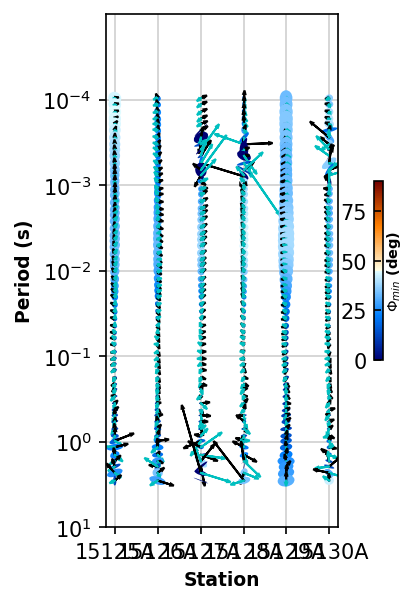

In [11]:
ptps_plot = mtd.plot_phase_tensor_pseudosection(x_stretch=10, plot_tipper="yri")

## 4. Plot Resistivity and Phase Pseudosections
Here we are plotting the xy, yx, and det components of the impedance tensor.

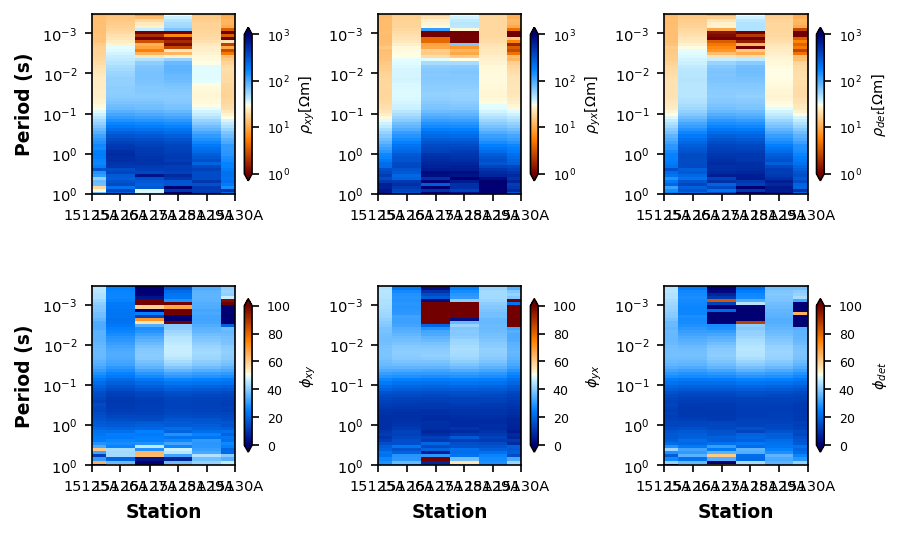

In [12]:
rpps_plot = mtd.plot_resistivity_phase_pseudosections(y_stretch=700, plot_det=True)

## 5. Plot Strike

Plotting strike angles are vary important when working with profile data.  We can plot strike in a couple of ways as a compilation of all strike angles, or per decade.  If you really want you could do it by region you query for the stations in each region.  

### 5a. All Periods

Here we will plot all periods of estimated strike. Notice that the plot includes the strike as estimated from the invariants (left) of [Weaver et al. (2002)](https://doi.org/10.1046/j.1365-246x.2000.00089.x), the phase tensor (middel) of [Caldwell et al. (2004)](https://doi.org/10.1111/j.1365-246X.2004.02281.x), and the induction vector strike.  

<div class="alert alert-block alert-warning">
<b>Important:</b> The induction strike points towards good conductors so should therefore be perpendicular to the impedance strike.  We left it this way as a sanity check on strike angles.
</div>

23:10:19T17:35:13 | INFO | line:892 |mtpy.imaging.plot_strike | _plot_all_periods | Note: North is assumed to be 0 and the strike angle is measured clockwise positive.


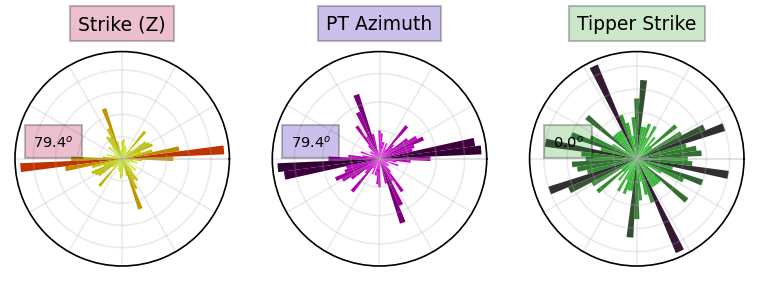

In [13]:
strike_plot_all = mtd.plot_strike()

### 5b. Per Decade

It can be informative to plot the strike angles per decade in period.  This can provide information on if strike angle changes with depth.  Because this is AMT data there isn't really a coherent strike angle until about 0.1 seconds.  Notice the induction vector (tipper) strike is perpendicular to the impedance strike below 0.1 seconds.

Strike statistics for invariant period range 1e-05 to 0.0001 (s) median=290.5 mode=0.0 mean=218.3
Strike statistics for pt period range 1e-05 to 0.0001 (s) median=290.8 mode=0.0 mean=217.8
Strike statistics for tipper period range 1e-05 to 0.0001 (s) median=35.3 mode=5.0 mean=32.6
Strike statistics for invariant period range 0.0001 to 0.001 (s) median=286.1 mode=337.7 mean=198.0
Strike statistics for pt period range 0.0001 to 0.001 (s) median=285.1 mode=357.5 mean=198.5
Strike statistics for tipper period range 0.0001 to 0.001 (s) median=1.3 mode=0.0 mean=350.6
Strike statistics for invariant period range 0.001 to 0.01 (s) median=76.4 mode=337.7 mean=156.6
Strike statistics for pt period range 0.001 to 0.01 (s) median=76.4 mode=337.7 mean=156.8
Strike statistics for tipper period range 0.001 to 0.01 (s) median=334.4 mode=59.6 mean=354.5
Strike statistics for invariant period range 0.01 to 0.1 (s) median=291.6 mode=332.7 mean=195.9
Strike statistics for pt period range 0.01 to 0.1 (s) m

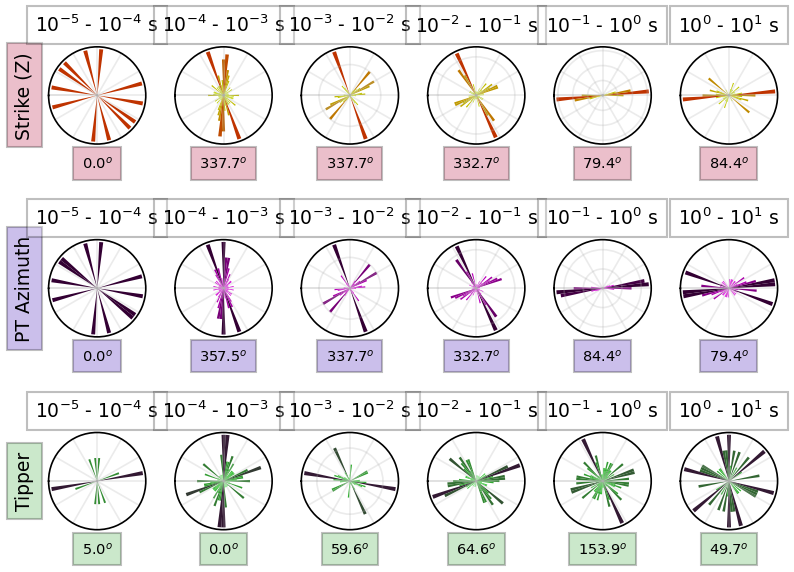

In [14]:
strike_plot_per_decade = mtd.plot_strike(plot_type=1, print_stats=True)

## 6. Rotate

Rotation is common for modeling especially 2D because we want the TE mode to be parallel to the profile line and TM to be perpendicular.  The strike plots above are good at indicating the dominant strike direction.  From above the dominant strike direction is around N85E.  There for if we want to rotate the data to a profile parallel with geoelectric strike we rotate by N85W or -85 degrees. 

In [15]:
mtd.rotate(-85)

23:10:19T17:35:58 | INFO | line:131 |mtpy.core.mt | rotate | Rotated transfer function by: -85.000 degrees clockwise
23:10:19T17:35:58 | INFO | line:131 |mtpy.core.mt | rotate | Rotated transfer function by: -85.000 degrees clockwise
23:10:19T17:35:58 | INFO | line:131 |mtpy.core.mt | rotate | Rotated transfer function by: -85.000 degrees clockwise
23:10:19T17:35:59 | INFO | line:131 |mtpy.core.mt | rotate | Rotated transfer function by: -85.000 degrees clockwise
23:10:19T17:35:59 | INFO | line:131 |mtpy.core.mt | rotate | Rotated transfer function by: -85.000 degrees clockwise
23:10:19T17:35:59 | INFO | line:131 |mtpy.core.mt | rotate | Rotated transfer function by: -85.000 degrees clockwise


### 6a. Plot Strike

Now if we plot the strike we see that the dominant strike is near 0.  Of course you can tweek the rotation angle to get to 0, but this is close enough for demonstration purposes.  

23:10:19T17:36:01 | INFO | line:793 |mtpy.imaging.plot_strike | _plot_per_period | Note: North is assumed to be 0 and the strike angle is measuredclockwise positive.


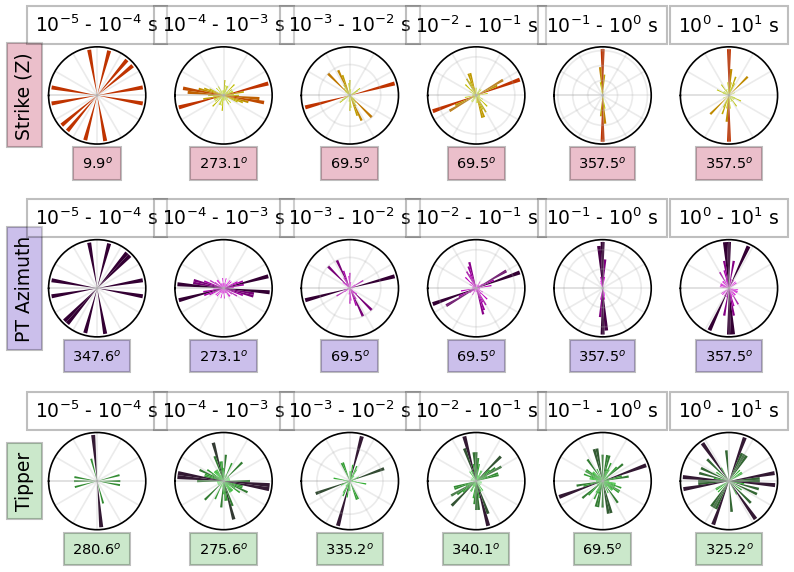

In [16]:
rotated_strike = mtd.plot_strike(plot_type=1)

## 7. Interpolate

If you have different transfer functions processed slightly differently then you'll likely have a mismatch in period and for modeling or plotting purposes its nice to have a single period index for all transfer functions.  

You can identify the min and max from the data, if that's what you want and then create period from there.  From above it looks like the period range is from $10^{-4}$ to 0.5 seconds. Here we will interpolate onto 23 periods in that range. 

In [17]:
import numpy as np

In [18]:
new_periods = np.logspace(-4, np.log10(0.5), 23)

In [19]:
interpolated_mtd = mtd.interpolate(new_periods, inplace=False)

In [20]:
interpolated_mtd

MTData([('profile.15125A',
         TF( station='15125A', latitude=-22.37, longitude=149.19, elevation=200.00 )),
        ('profile.15126A',
         TF( station='15126A', latitude=-22.37, longitude=149.19, elevation=200.00 )),
        ('profile.15127A',
         TF( station='15127A', latitude=-22.37, longitude=149.20, elevation=201.00 )),
        ('profile.15128A',
         TF( station='15128A', latitude=-22.37, longitude=149.20, elevation=200.00 )),
        ('profile.15129A',
         TF( station='15129A', latitude=-22.37, longitude=149.21, elevation=202.00 )),
        ('profile.15130A',
         TF( station='15130A', latitude=-22.37, longitude=149.21, elevation=201.00 ))])

### 7a. Compare plots

Now we can compare to see how the interpolated transfer function compares to the original.  Can plot them individually. 

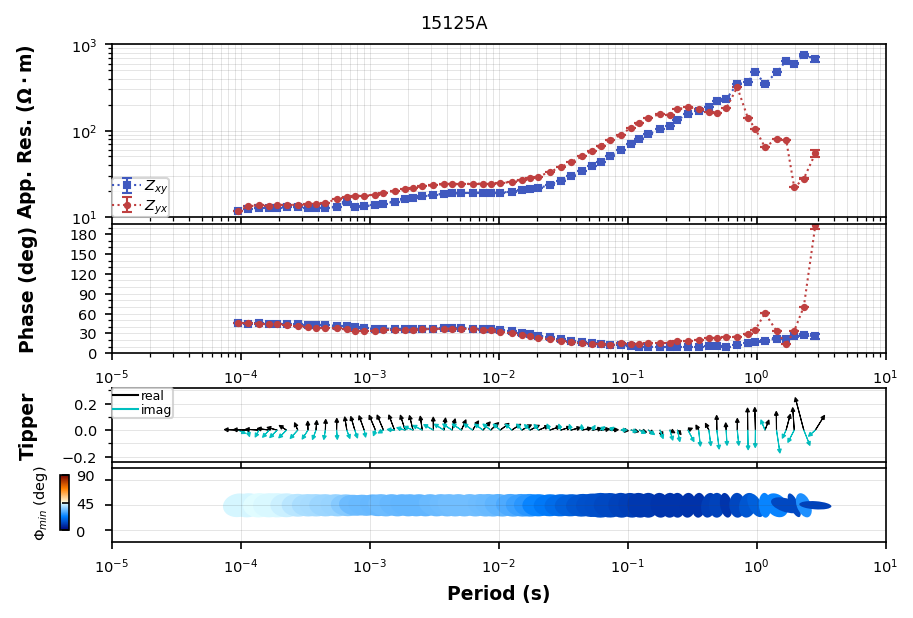

In [21]:
original = mtd.plot_mt_response("profile.15125A")

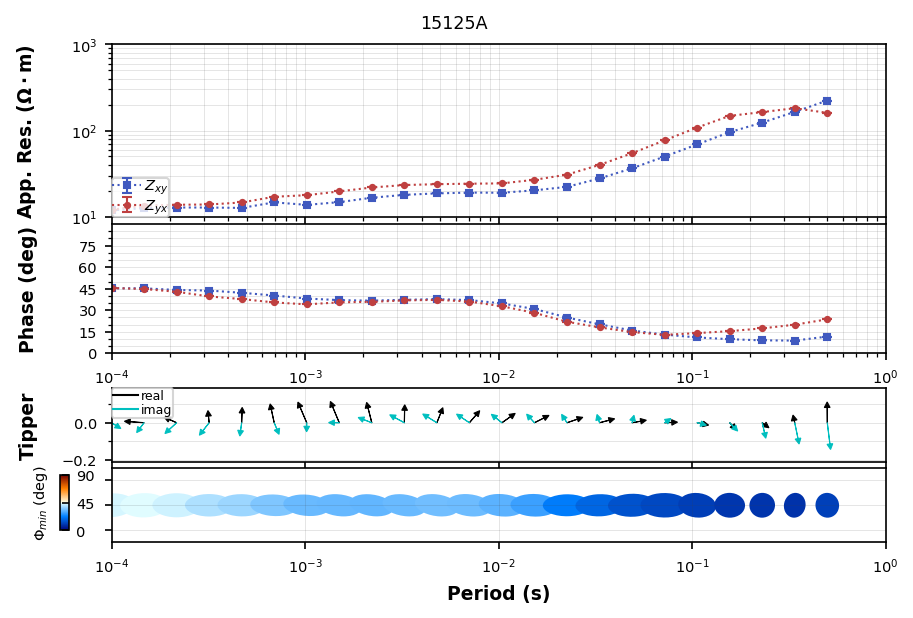

In [22]:
interpolated = interpolated_mtd.plot_mt_response("profile.15125A")

### 7b. Compare in same plot

To plot these in the same plot we need to do some manipulating. First change the survey name in the interpolated data. Then create a new `MTData` object that is just two transfer functions with the same name but from the origina and interpolated data sets. 

In [23]:
from mtpy.core.mt_data import MTData
from mtpy.imaging import PlotMultipleResponses

In [24]:
new_interpolated_mtd = MTData()
for mt_object in interpolated_mtd.values():
    mt_object.survey_metadata.id = "interpolated"
    new_interpolated_mtd.add_station(mt_object)

In [25]:
new_interpolated_mtd.station_locations

,survey,station,latitude,longitude,elevation,datum_epsg,east,north,utm_epsg,model_east,model_north,model_elevation,profile_offset
0,interpolated,15125A,-22.370806,149.188639,200.0,4326,725360.330833,7.524490e+06,32755,-1252.884265,35.819931,200.0,0.0
1,interpolated,15126A,-22.370639,149.193500,200.0,4326,725861.314778,7.524502e+06,32755,-751.900320,46.986774,200.0,0.0
2,interpolated,15127A,-22.371028,149.198417,201.0,4326,726367.124612,7.524451e+06,32755,-246.090486,-3.473507,201.0,0.0
3,interpolated,15128A,-22.370861,149.203306,200.0,4326,726870.972550,7.524462e+06,32755,257.757452,7.618863,200.0,0.0
4,interpolated,15129A,-22.371083,149.208083,202.0,4326,727362.745811,7.524430e+06,32755,749.530712,-24.206492,202.0,0.0
5,interpolated,15130A,-22.371222,149.212972,201.0,4326,727866.099363,7.524408e+06,32755,1252.884265,-46.986774,201.0,0.0


In [26]:
compare_mtd = MTData()
compare_mtd.add_station(mtd.get_station("15125A", "profile"))
compare_mtd.add_station(new_interpolated_mtd.get_station("15125A", "interpolated"))

<Figure size 432x288 with 0 Axes>

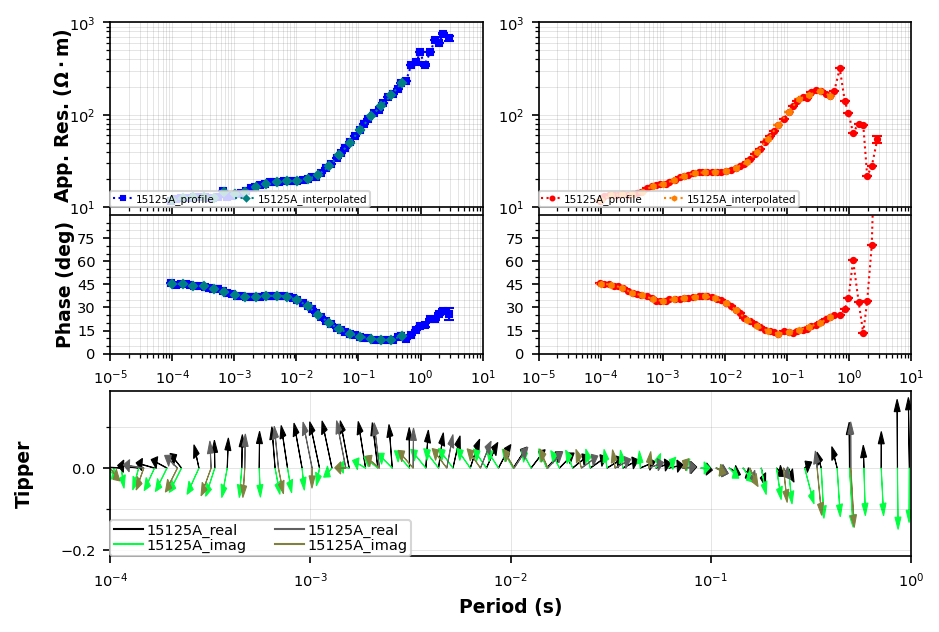

In [27]:
compare_same_plot = PlotMultipleResponses(
    compare_mtd, plot_style="compare", plot_tipper="yri", fig_num=4
)